In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats
import numpy as np
import pandas as pd
#Visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go


In [ ]:
df=pd.read_csv('preprocessed.csv')
df.shape

(6845, 17)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df.head()

,flow_duration,Header_Length,Protocol Type,Rate,urg_count,rst_count,Tot sum,Min,Max,AVG,Tot size,IAT,Variance,ratioPacketSizeToTotal,ratioTotalSizeToDuration
0,-0.245675,0.036409,-0.581913,-0.146124,-0.246885,0.096990,0.896914,2.556650,1.947607,2.545784,3.007555,-1.229292,0.279803,1.331092,-0.290519
1,-0.217959,0.558770,-0.485974,-0.152286,-0.087476,0.806597,0.822180,-0.377260,1.692497,1.824066,3.383785,-1.229292,0.739672,1.823924,-0.290531
2,-0.206885,-0.250171,-0.485974,-0.146467,0.138559,-0.047567,2.330451,-0.377260,1.947607,1.544180,1.643194,1.254592,0.969606,-0.774921,-0.290529
3,-0.195727,-0.351484,-0.485974,-0.160635,0.306143,-0.054471,-0.558902,-0.346805,-0.513828,-0.526194,-0.462549,-1.229292,0.739672,1.947328,-0.290536
4,-0.168971,1.226941,-0.485974,-0.154693,0.136515,1.583461,1.310750,-0.377260,2.993693,0.650702,3.118514,1.254630,0.969606,0.741642,-0.290533


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(numeric_df)
standardized_data


array([[-0.24567531,  0.0364092 , -0.58191319, ...,  0.2798029 ,
         1.33109177, -0.29051922],
       [-0.21795916,  0.5587704 , -0.48597418, ...,  0.73967189,
         1.82392441, -0.29053149],
       [-0.20688496, -0.25017076, -0.48597418, ...,  0.96960639,
        -0.77492095, -0.29052894],
       ...,
       [-0.21059408, -0.36638283, -0.48597418, ...,  0.96960639,
         0.33333197, -0.29053063],
       [-0.22442112,  0.09773745, -0.48597418, ...,  0.04986841,
         2.21594857, -0.29053447],
       [ 0.08696562, -0.38479155,  0.08965987, ...,  0.73967189,
         0.83583539, -0.29053592]])

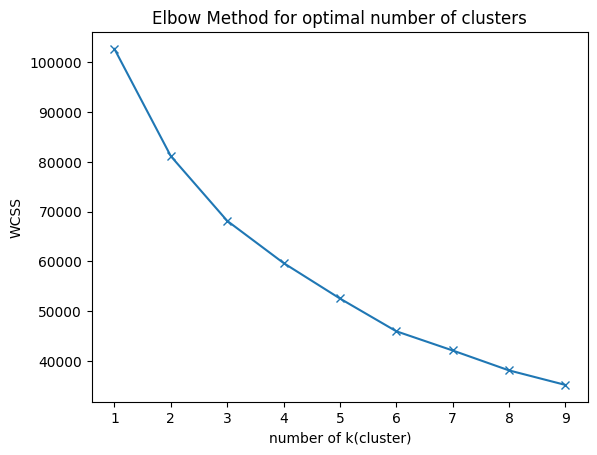

In [ ]:
from sklearn.cluster import KMeans
wcss=[] #liste oluştur
cluster_range=range(1,10)
for k  in cluster_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(cluster_range,wcss,marker='x')
plt.xlabel("number of k(cluster)")
plt.ylabel("WCSS")
plt.title("Elbow Method for optimal number of clusters")
plt.show()

In [ ]:
clusters_df = pd.DataFrame({'clusters':cluster_range,
                            'inertia': wcss})
clusters_df

,clusters,inertia
0,1,102675.000000
1,2,81144.350160
2,3,68153.796045
3,4,59682.222908
4,5,52558.561023
5,6,45976.587326
6,7,42119.133244
7,8,38117.755625
8,9,35199.704594


In [ ]:
kmeans=KMeans(n_clusters = 3)
kmeans.fit(standardized_data)

KMeans(n_clusters=3)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.05404212, -0.18966539, -0.22204033,  0.02627391, -0.12221548,
        -0.20632038, -0.33681108, -0.28942271, -0.30821484, -0.37083328,
        -0.35191286, -0.0279859 ,  0.00420539,  0.02759808, -0.22658087],
       [-0.18223896,  1.31437426, -0.41620972, -0.07032617,  0.86964723,
         1.40574602,  1.77013704,  1.04002762,  1.87642001,  1.94197035,
         1.83922934,  0.1536689 ,  0.55490928,  0.03211837, -0.29042157],
       [-0.25639397, -0.40084824,  3.29894884, -0.15987565, -0.3020483 ,
        -0.38969681,  0.37520368,  1.24966667, -0.15120548,  0.42654482,
         0.41183488,  0.01847963, -1.11689443, -0.3722306 ,  3.10754287]])

In [ ]:
centroid_df = pd.DataFrame(centroids,columns = list(numeric_df.columns))
centroid_df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,-0.067976,0.953653,-0.481240,0.496818,-0.063967,-0.063967,-0.011211,-0.125819,-0.297834,-0.176640,...,1.757593,1.809892,1.644206,0.19037,0.192744,1.726425,1.809348,1.278189,0.691357,0.192227
1,0.029811,-0.144916,0.731346,-0.281979,0.109397,0.109397,-0.011211,-0.125819,-0.298396,-0.181218,...,-0.144420,-0.375574,-0.148054,-0.01824,-0.020159,-0.054408,-0.375103,-0.250272,-0.285048,-0.019924
2,-0.002032,-0.204106,-0.457195,0.069402,-0.071141,-0.071141,0.013391,0.150282,0.356220,0.214881,...,-0.480564,-0.301791,-0.438539,-0.04984,-0.049023,-0.546469,-0.302005,-0.225870,0.005217,-0.049045


### Apply Kernel PCA to reduce dataset dimensionality 

In [ ]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
# transform and fit the feature of the training set
pca_df = Kernel_pca.fit_transform(standardized_data)


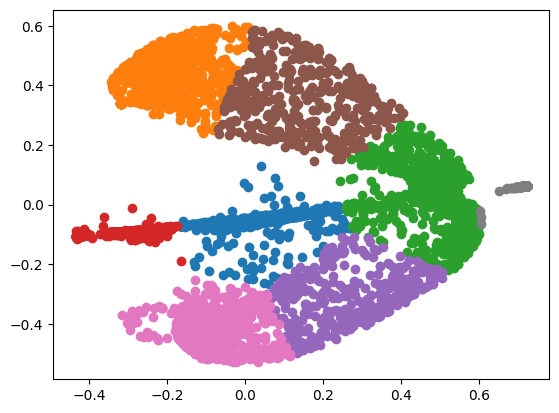

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 8)
#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)
centroids = kmeans.cluster_centers_
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(pca_df[label == i,0] , pca_df[label == i,1] , label = i)

# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k)
# plt.legend()
# plt.show()

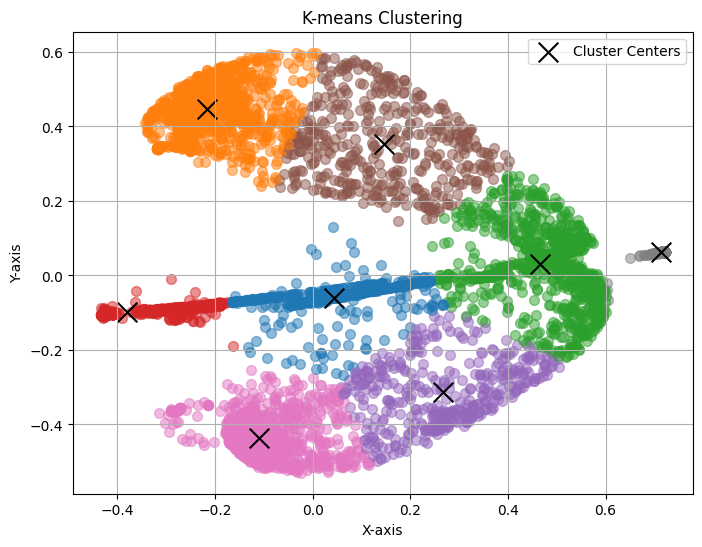

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Plotting data points and cluster centers
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for i in range(len(pca_df)):
    plt.scatter(pca_df[i, 0], pca_df[i, 1], c='C'+str(cluster_labels[i]), s=50, alpha=0.5)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=200, label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a3c41eb-c99a-4899-842d-6de17d10af25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>